In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import os

import numpy as np
import pandas as pd
import seaborn as sb

from keras.models import Sequential  # class
from keras.models import load_model  # model 사용
from keras.layers import Dense       # 전결합
from keras.layers import Dropout     # 특정 node를 사용안함.
from keras.callbacks import EarlyStopping   # 학습 자동 중지
from keras.callbacks import ModelCheckpoint # 우수한 학습 모델 파일 저장
from keras import regularizers 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # 학습셋과 테스트셋의 분리 지원
from sklearn.model_selection import StratifiedKFold  # K겹 교차 검증

import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

%matplotlib inline  

Using TensorFlow backend.


In [5]:
df = pd.read_csv('./iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
print('1) df.head()')
print(df.head())

1) df.head()
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


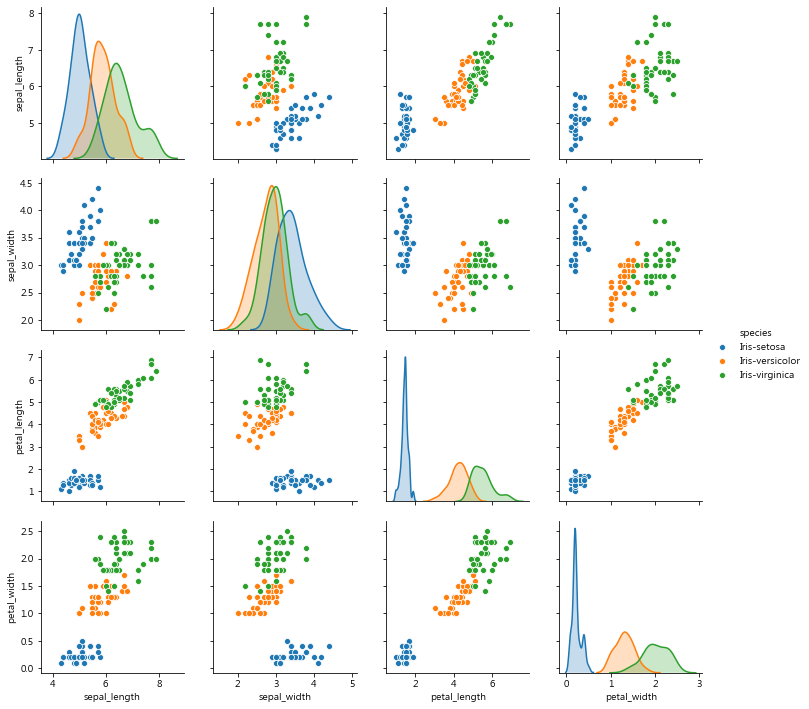

In [6]:
sb.pairplot(df, hue='species')
plt.show()

In [7]:
data = df.values # 값 추출
print(type(data))
X = data[:, 0:4].astype(float)  # 행렬, 2차원 배열
print(X[0:5, 0:4])  # 5개의 데이터 행만 출력
Y_obj = data[:, 4]  # 1차원 배열
print(Y_obj[0:5])   # 5개의 class 분류 출력

<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
